  A B C D E F
A 0 1 0 0 0 0
B 1 0 1 0 0 0
C 0 1 0 1 0 0
D 0 0 1 0 1 0
E 0 0 0 1 0 1
F 0 0 0 0 1 0


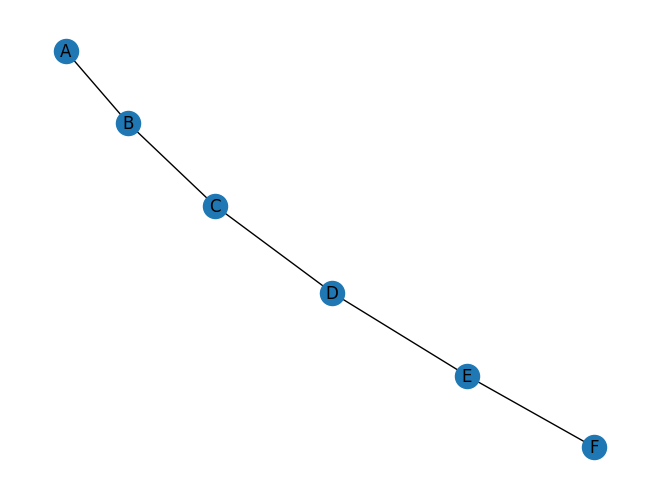

In [23]:
import networkx as nx
import numpy as np
import math
n=6
graph = nx.path_graph(n)


mapping = {i: chr(65 + i) for i in range(n)}  # 65 is ASCII for 'A'
graph = nx.relabel_nodes(graph, mapping)

# Draw graph with new labels
nx.draw(graph, with_labels=True)

# Convert the graph to an adjacency matrix
adj_matrix = nx.adjacency_matrix(graph)

# Displaying the adjacency matrix with labels
adj_array = np.array(adj_matrix.todense())
print(" ", " ".join(mapping.values()))
for row_label, row in zip(mapping.values(), adj_array):
    print(row_label, " ".join(map(str, row)))

In [6]:
new_line = '\n'
out = f''''''
out+= f"   {' '.join(mapping.values())}"
for row_label, row in zip(mapping.values(), adj_array):
    out+=f'''{new_line} {row_label} {' '.join(map(str, row))}'''
out

'   A B C D E F\n A 0 1 0 0 0 0\n B 1 0 1 0 0 0\n C 0 1 0 1 0 0\n D 0 0 1 0 1 0\n E 0 0 0 1 0 1\n F 0 0 0 0 1 0'

In [4]:
adj_matrix = nx.adjacency_matrix(graph)
adj_array = np.array(adj_matrix.todense())

In [6]:
adj_array

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [8]:
nx.shortest_path(graph, source='A', target='F', weight=None, method='dijkstra')

['A', 'B', 'C', 'D', 'E', 'F']

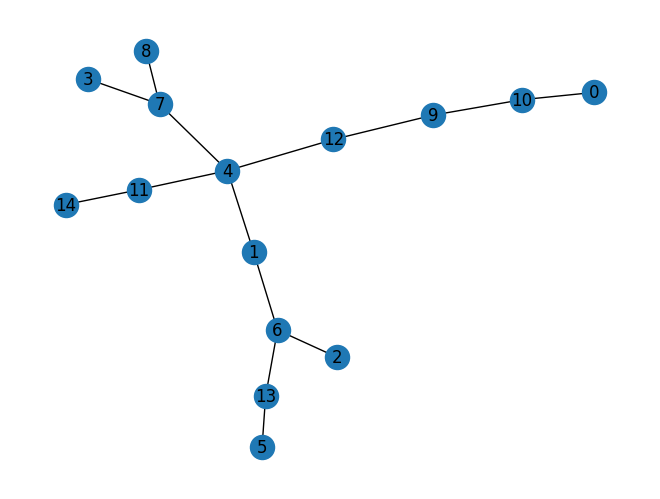

In [182]:
#level 2
n=15
graph = nx.random_tree(n, seed = int(10000*random.random()))
nx.draw(graph, with_labels=True)

In [183]:
nodes = graph.nodes

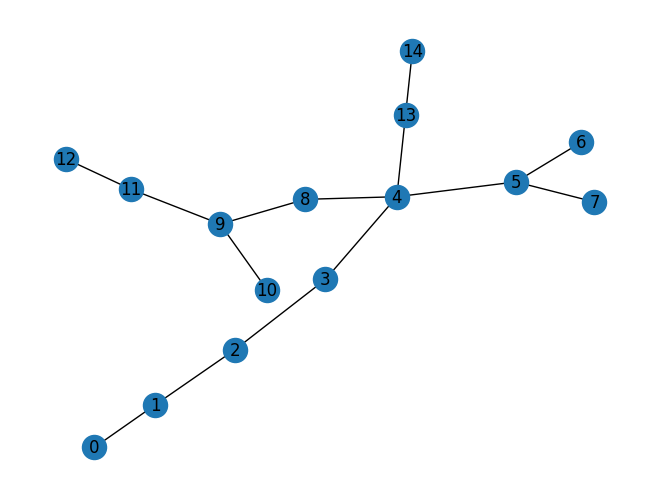

In [184]:
dfs_traversal = list(nx.dfs_edges(graph, source=0))
mapping = {}
for k,(a,b) in enumerate([(0,0)] + dfs_traversal):
    mapping[b] = k

graph = nx.relabel_nodes(graph, mapping)
nx.draw(graph, with_labels=True)

In [188]:
adj_matrix = nx.adjacency_matrix(graph, nodelist = list(range(len(graph.nodes))))
adj_array = np.array(adj_matrix.todense())
adj_array

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

# jumbling the nodes

In [ ]:
import numpy as np

def rename_adjacency_matrix(matrix, mapping):
    """
    Rename the nodes in the adjacency matrix based on a given mapping.
    """
    # Convert mapping to permutation
    n = matrix.shape[0]
    permutation = list(range(n))
    for original, renamed in mapping.items():
        permutation[original] = renamed

    # Adjust rows and columns based on the permutation
    temp_matrix = matrix[permutation]
    renamed_matrix = temp_matrix[:, permutation]
    
    return renamed_matrix

# Example:
original_matrix = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

# Say the renaming is A->A, B->D, C->B, D->C. In 0-indexing, this is: {0: 0, 1: 3, 2: 1, 3: 2}
mapping = {0: 0, 1: 3, 2: 1, 3: 2}

new_matrix = rename_adjacency_matrix(original_matrix, mapping)
print(new_matrix)


In [13]:
import random

shuffled_list = sorted(list(range(len(adj_array))), key=lambda x: random.random())


In [14]:
adj_array

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [15]:
shuffled_list

[3, 0, 4, 2, 1, 5]

In [16]:
mapping= {i: shuffled_list[i] for i in range(len(adj_array))}
mapping

{0: 3, 1: 0, 2: 4, 3: 2, 4: 1, 5: 5}

In [21]:
def rename_adjacency_matrix(matrix, mapping):
    """
    Rename the nodes in the adjacency matrix based on a given mapping.
    """
    # Convert mapping to permutation
    n = matrix.shape[0]
    permutation = list(range(n))
    for original, renamed in mapping.items():
        permutation[original] = renamed

    # Adjust rows and columns based on the permutation
    temp_matrix = matrix[permutation]
    renamed_matrix = temp_matrix[:, permutation]
    
    return renamed_matrix

# Example:
original_matrix = np.array([
        [0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 0]
    ])

    # Say the renaming is A->A, B->D, C->B, D->C. In 0-indexing, this is: {0: 0, 1: 3, 2: 1, 3: 2}
mapping = {0: 0, 1: 3, 2: 1, 3: 2}

new_matrix = rename_adjacency_matrix(original_matrix, mapping)
print(new_matrix)


[[0 0 1 0]
 [0 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]


In [18]:
rename_adjacency_matrix(adj_array, mapping)

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]])